In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from sklearn import datasets
data = datasets.load_iris()
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [ ]:
X = pd.DataFrame(data['data'])
Y = pd.DataFrame(data['target'])

In [ ]:
 # renaming columns
X.set_axis(data['feature_names'] , axis = 'columns' , inplace = True)
Y.set_axis(['species'], axis = 'columns' , inplace = True)
columns = data['feature_names'] + ['species']

<ipython-input-10-b7b13510a9ec>:2: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  X.set_axis(data['feature_names'] , axis = 'columns' , inplace = True)
<ipython-input-10-b7b13510a9ec>:3: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  Y.set_axis(['species'], axis = 'columns' , inplace = True)


In [ ]:
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
print(Y.head())
print(Y.value_counts())

   species
0        0
1        0
2        0
3        0
4        0
species
0          50
1          50
2          50
dtype: int64


In [ ]:
data = pd.concat([X, Y], axis=1, ignore_index=True)
columns = ['sepal_len', 'sepal_width' , 'petal_len' , 'petal_width' , 'species']
data.set_axis(columns , axis = 'columns' , inplace = True )

<ipython-input-13-ebf2187a06b4>:3: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  data.set_axis(columns , axis = 'columns' , inplace = True )


In [ ]:
print('total rows : ' , len(data))

total rows :  150


In [ ]:
data[1:5]

,sepal_len,sepal_width,petal_len,petal_width,species
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


**2D Scatter Plot**

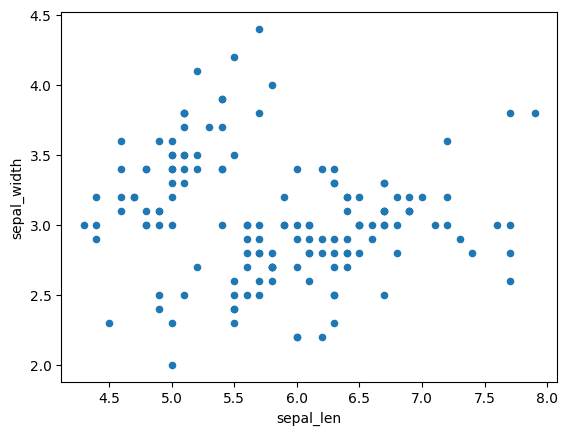

In [ ]:
data.plot(kind = 'scatter' , x = 'sepal_len' , y = 'sepal_width')
plt.show()


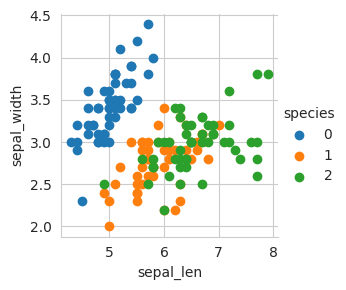

In [ ]:
sns.set_style("whitegrid");
sns.FacetGrid(data, hue="species") \
   .map(plt.scatter, "sepal_len", "sepal_width") \
   .add_legend();
plt.show();

we can see that type 0 is clearly separable with help of sepal len , width . 1 , 2 are mixed hard to separate .

**Pair plot**
* Now we can see for every pair of attribute how they are related

* Diagonal shows pdf of data wrt attribute.

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


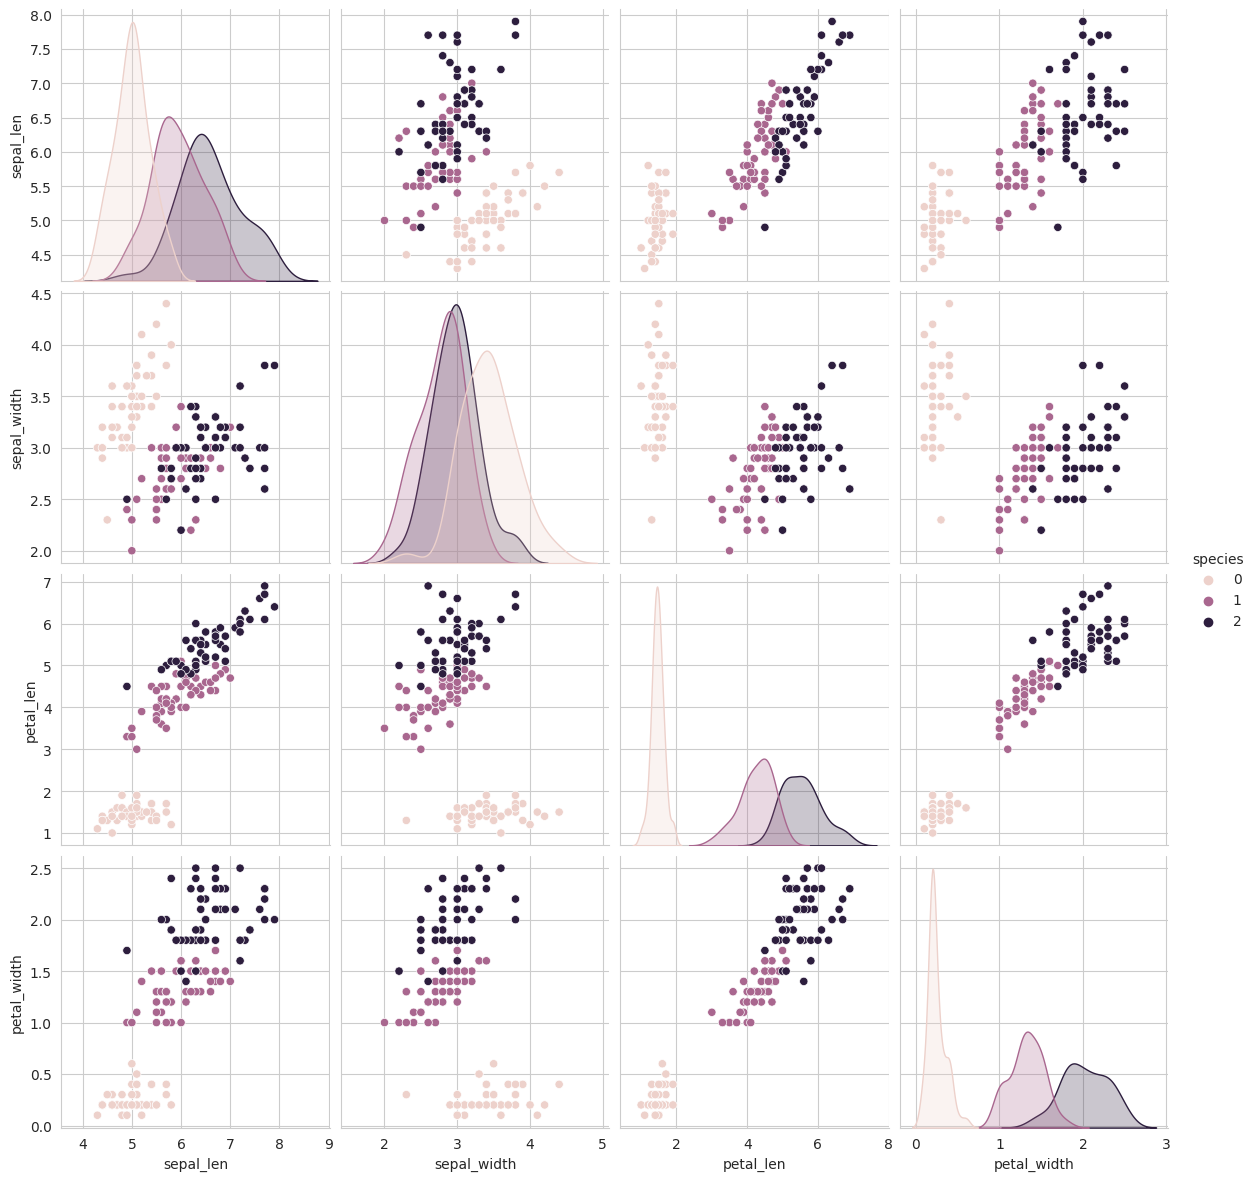

In [ ]:
plt.close()
sns.set_style("whitegrid")
sns.pairplot(data , hue='species' , size = 3)
plt.show()

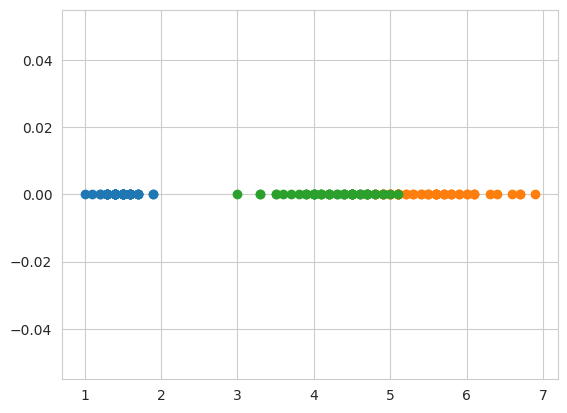

In [ ]:

iris_setosa = data.loc[data["species"] == 0];
iris_virginica = data.loc[data["species"] == 1];
iris_versicolor = data.loc[data["species"] == 2];
#print(iris_setosa["petal_length"])
plt.plot(iris_setosa["petal_len"], np.zeros_like(iris_setosa['petal_len']), 'o')
plt.plot(iris_versicolor["petal_len"], np.zeros_like(iris_versicolor['petal_len']), 'o')
plt.plot(iris_virginica["petal_len"], np.zeros_like(iris_virginica['petal_len']), 'o')

plt.show()

**Better way to represent 1 D scatter plot**
* 1D is confusing and overlaping as above
* better to look at histograms , pdf and cdf

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packa

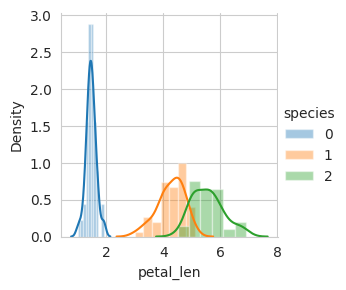

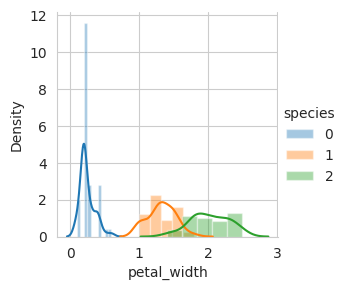

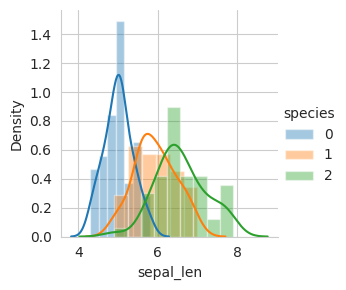

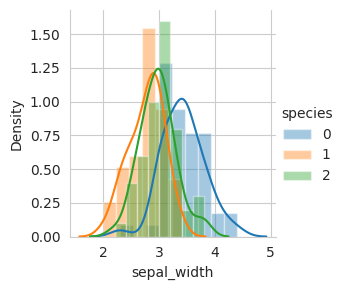

In [ ]:
# petal length

sns.FacetGrid(data , hue = "species" ).map(sns.distplot , "petal_len").add_legend()
sns.FacetGrid(data , hue = "species" ).map(sns.distplot , "petal_width").add_legend()
sns.FacetGrid(data , hue = "species" ).map(sns.distplot , "sepal_len").add_legend()
sns.FacetGrid(data , hue = "species" ).map(sns.distplot , "sepal_width").add_legend()


plt.show()

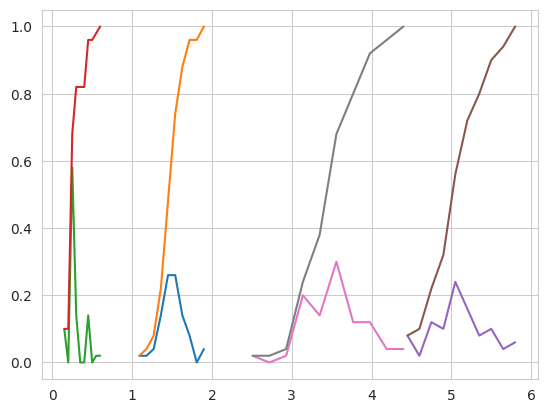

In [ ]:
for feature in ['petal_len' , 'petal_width' , 'sepal_len' , 'sepal_width'] :
    counts, bin_edges = np.histogram(iris_setosa[feature], bins=10,
                                    density = True)
    pdf = counts/(sum(counts))
    # print(pdf);
    # print(bin_edges);

    cdf = np.cumsum(pdf)
    plt.plot(bin_edges[1:],pdf)
    plt.plot(bin_edges[1:], cdf)




**Mean , Variance , Standard deviation**

In [45]:
#Mean, Variance, Std-deviation,
print("Means:")
print(np.mean(iris_setosa["petal_len"]))
#Mean with an outlier.
print(np.mean(np.append(iris_setosa["petal_len"],50)));
print(np.mean(iris_virginica["petal_len"]))
print(np.mean(iris_versicolor["petal_len"]))

print("\nStd-dev:");
print(np.std(iris_setosa["petal_len"]))
print(np.std(np.append(iris_setosa["petal_len"] , 50)))
print(np.std(iris_virginica["petal_len"]))
print(np.std(iris_versicolor["petal_len"]))


#Median, Quantiles, Percentiles, IQR.
print("\nMedians:")
print(np.median(iris_setosa["petal_len"]))
#Median with an outlier
print(np.median(np.append(iris_setosa["petal_len"],50)));
print(np.median(iris_virginica["petal_len"]))
print(np.median(iris_versicolor["petal_len"]))


print("\nQuantiles:")
print(np.percentile(iris_setosa["petal_len"],np.arange(0, 100, 25)))
print(np.percentile(iris_virginica["petal_len"],np.arange(0, 100, 25)))
print(np.percentile(iris_versicolor["petal_len"], np.arange(0, 100, 25)))

print("\n90th Percentiles:")
print(np.percentile(iris_setosa["petal_len"],90))
print(np.percentile(iris_virginica["petal_len"],90))
print(np.percentile(iris_versicolor["petal_len"], 90))

from statsmodels import robust
print ("\nMedian Absolute Deviation")
print(robust.mad(iris_setosa["petal_len"]))
print(robust.mad(iris_virginica["petal_len"]))
print(robust.mad(iris_versicolor["petal_len"]))


Means:
1.4620000000000002
2.4137254901960787
4.26
5.5520000000000005

Std-dev:
0.17191858538273283
6.731868010072429
0.4651881339845203
0.546347874526844

Medians:
1.5
1.5
4.35
5.55

Quantiles:
[1.    1.4   1.5   1.575]
[3.   4.   4.35 4.6 ]
[4.5   5.1   5.55  5.875]

90th Percentiles:
1.7
4.8
6.31

Median Absolute Deviation
0.14826022185056031
0.5189107764769602
0.6671709983275211
